In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
os.getcwd()
os.chdir(r'D:\New folder\ML\netflix-prize-data')

In [10]:
start = datetime.now()

if not os.path.isfile('data.csv'):
    data = open('data.csv',mode='w')
    
    row = list()
    
    files=['combined_data_1.txt','combined_data_2.txt','combined_data_3.txt','combined_data_4.txt']
    
    for file in files:
        with open(file) as f:
            for line in f:
                line = line.strip()
                if line.endswith(':'):
                    movie_id = line.replace(':','')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0,movie_id)
                    data.write(','.join(row))
                    data.write('\n')
    data.close()
    
   
print('Time taken = ', datetime.now()-start)

Time taken =  0:00:00.042889


In [9]:
data = pd.read_csv('data.csv',names=['movie','user','rating','date'])
data.sort_values(by='date',inplace=True)
data.head(10)

,movie,user,rating,date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11
20393918,3870,510180,2,1999-11-11
46516889,8357,510180,4,1999-11-11
89491833,15894,510180,3,1999-11-11
49973109,9003,510180,3,1999-11-11
51805125,9392,510180,3,1999-11-11


In [10]:
data.describe()['rating']

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [11]:
data.isnull().any()

movie     False
user      False
rating    False
date      False
dtype: bool

In [12]:
duplicate = data.duplicated(['movie','user','rating'])
dup_sum = sum(duplicate)
print(dup_sum)

0


In [13]:
data.shape

(100480507, 4)

In [14]:
print(len(np.unique(data.user)))
print(len(np.unique(data.movie)))

480189
17770


In [11]:
if not os.path.isfile('train.csv'):
    data.iloc[:int(data.shape[0]*0.80)].to_csv('train.csv',index=False)

if not os.path.isfile('test.csv'):
    data.iloc[int(data.shape[0]*0.80):].to_csv('test.csv',index=False)
    
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [16]:
train.head()

,movie,user,rating,date
0,10341,510180,4,1999-11-11
1,1798,510180,5,1999-11-11
2,10774,510180,3,1999-11-11
3,8651,510180,2,1999-11-11
4,14660,510180,2,1999-11-11


In [17]:
test.head()

,movie,user,rating,date
0,5926,2294429,2,2005-08-08
1,10158,1743373,4,2005-08-08
2,17064,381625,5,2005-08-08
3,1443,1252933,5,2005-08-08
4,1201,1434500,4,2005-08-08


In [18]:
def human(num,units='M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + 'K'
    
    if units == 'm':
        return str(num/10**6) + 'M'
    
    if units == 'b':
        return str(num/10**9) + 'B'

<AxesSubplot:xlabel='rating', ylabel='count'>

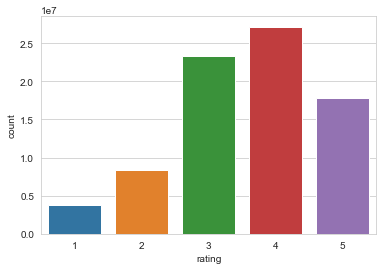

In [19]:
sns.countplot(train.rating)

In [20]:
user_rating = train.groupby(by='user')['rating'].count().sort_values(ascending=False)

user_rating.head()

user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
Name: rating, dtype: int64

In [21]:
user_rating.head(-5)

user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
           ...  
1284444        1
2367651        1
1442367        1
1594466        1
1041141        1
Name: rating, Length: 405036, dtype: int64

<AxesSubplot:>

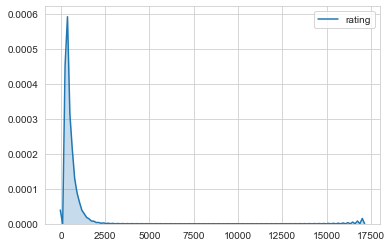

In [22]:
sns.kdeplot(user_rating,shade=True)

<AxesSubplot:>

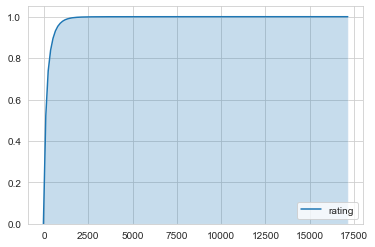

In [23]:
sns.kdeplot(user_rating,shade=True,cumulative=True)

In [24]:
 user_rating.describe()

count    405041.000000
mean        198.459921
std         290.793238
min           1.000000
25%          34.000000
50%          89.000000
75%         245.000000
max       17112.000000
Name: rating, dtype: float64

In [26]:
movie_rating = train.groupby(by='movie')['rating'].count().sort_values(ascending=False)

movie_rating.head()

movie
5317     179684
15124    176811
1905     160062
6287     155787
14313    153899
Name: rating, dtype: int64

<AxesSubplot:>

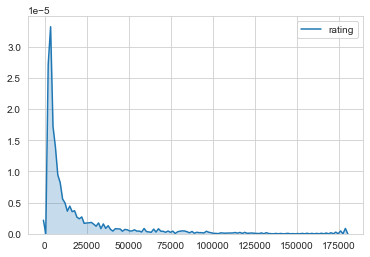

In [27]:
sns.kdeplot(movie_rating,shade=True)

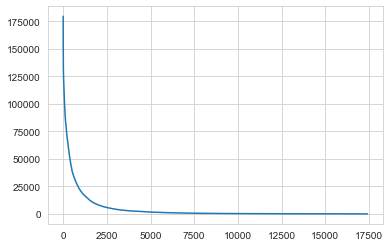

In [28]:
plt.plot(movie_rating.values)

In [5]:
from scipy import sparse

In [12]:
start = datetime.now()

if os.path.isfile('train_sparse_matrix.npz'):
    train_sparse_matrix = sparse.load_npz('train_sparse_matrix.npz')
    
else:
    train_sparse_matrix = sparse.csr_matrix((train.rating.values,(train.user.values,train.movie.values)),)
    sparse.save_npz('train_sparse_matrix.npz',train_sparse_matrix)
    
print(datetime.now()-start)

0:01:22.517217


In [13]:
start = datetime.now()

if os.path.isfile('test_sparse_matrix.npz'):
    test_sparse_matrix = sparse.load_npz('test_sparse_matrix.npz')
    
else:
    test_sparse_matrix = sparse.csr_matrix((test.rating.values,(test.user.values,test.movie.values)),)
    sparse.save_npz('test_sparse_matrix.npz',test_sparse_matrix)
    
print(datetime.now()-start)

0:00:01.590552


In [33]:
users,movies = train_sparse_matrix.shape

elm = train_sparse_matrix.count_nonzero()

print(1-elm/(users*movies))

0.998292709259195


In [34]:
users1,movies1 = test_sparse_matrix.shape

elm1 = test_sparse_matrix.count_nonzero()

print(1-elm1/(users1*movies1))

0.9995731772988694


In [35]:
train_sparse_matrix.shape

(2649430, 17771)

In [36]:
test_sparse_matrix.shape

(2649430, 17771)

In [20]:
def get_avg_rating(matrix,user):
    ax = 1 if user else 0
    
    sum_of_rating = matrix.sum(axis=ax).A1
    
    is_rated = matrix!=0
    
    no_of_rating = is_rated.sum(axis=ax).A1
    
    u,m = matrix.shape
    
    avg_rating = { i:sum_of_rating[i]/no_of_rating[i] for i in range(u if user else m) if  no_of_rating[i]!=0}
    
    return avg_rating

In [11]:
train_avg = dict()

train_global_avg = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()

train_avg['global'] = train_global_avg

train_avg

NameError: name 'train_sparse_matrix' is not defined

In [39]:
train_avg['user'] = get_avg_rating(train_sparse_matrix,1)
train_avg['user'][10]

3.3781094527363185

In [40]:
train_avg['movie'] = get_avg_rating(train_sparse_matrix,0)
train_avg['movie'][15]

3.3038461538461537

<AxesSubplot:>

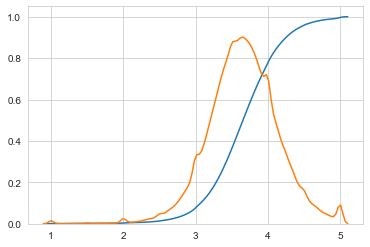

In [41]:
user_avg = [rate for rate in train_avg['user'].values()]
sns.distplot(user_avg,hist = False,kde_kws = dict(cumulative=True))
sns.distplot(user_avg,hist=False,)

<AxesSubplot:>

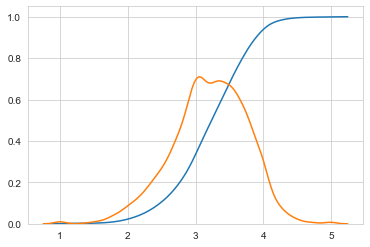

In [42]:
movie_avg = [rate for rate in train_avg['movie'].values()]
sns.distplot(movie_avg,hist = False,kde_kws = dict(cumulative=True))
sns.distplot(movie_avg,hist=False,)

In [43]:
total_user = len(np.unique(data.user))
user_train = len(train_avg['user'])
new_users = total_user - user_train

In [44]:
## clod start problem around 16%

print(new_users)
print(new_users/total_user)

75148
0.15649671275268695


In [45]:
total_movie = len(np.unique(data.movie))
movie_train = len(train_avg['movie'])
new_movies = total_movie - movie_train

In [46]:
##new users ~~ around 2%

print(new_movies)
print(new_movies/total_movie)

346
0.019471018570624648


In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
start = datetime.now()
if not os.path.isfile('movie_movie_sim_sparse.npz'):
    mov_mov_sparse = cosine_similarity(X=train_sparse_matrix.T,dense_output=False)
    sparse.save_npz('mov_mov_sim_sparse.npz',mov_mov_sparse)
    
else:
    mov_mov_sparse = sparse.load_npz('mov_mov_sim_sparse.npz')
    
print(mov_mov_sparse.shape)
print(datetime.now()-start)

(17771, 17771)
0:19:41.057699


In [49]:
mov_title = pd.read_csv('movie_titles.csv',sep=',',names=['mov_id','year_of_release','title'],index_col = 'mov_id',encoding='ISO-8859-1')

In [50]:
mov_title.head(10)

,year_of_release,title
mov_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [51]:
mv_id=67

print(mov_title.loc[mv_id])

year_of_release                1997
title              Vampire Journals
Name: 67, dtype: object


In [52]:
print(train_sparse_matrix[:,mv_id].count_nonzero())

270


In [53]:
print(mov_mov_sparse[:,mv_id].count_nonzero())

17284


In [54]:
similarities = mov_mov_sparse[mv_id].toarray().ravel()
similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:]

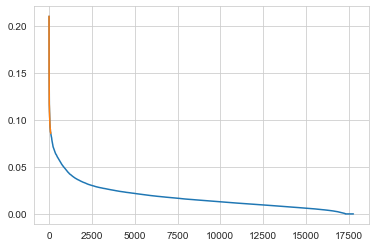

In [55]:
plt.plot(similarities[sim_indices],label = 'All movies')
plt.plot(similarities[sim_indices[:100]],label = 'Top 100')
plt.show()

In [56]:
mov_title.loc[sim_indices[:10]]

,year_of_release,title
mov_id,,
323,1999.0,Modern Vampires
4044,1998.0,Subspecies 4: Bloodstorm
1688,1993.0,To Sleep With a Vampire
13962,2001.0,Dracula: The Dark Prince
12053,1993.0,Dracula Rising
16279,2002.0,Vampires: Los Muertos
4667,1996.0,Vampirella
1900,1997.0,Club Vampire
13873,2001.0,The Breed


In [57]:
import surprise

In [58]:
x_idx_train = np.random.choice(train_sparse_matrix.shape[0],30000,replace=False)
y_idx_train = np.random.choice(train_sparse_matrix.shape[1],3000,replace=False)

x_idx_test = np.random.choice(test_sparse_matrix.shape[0],30000,replace=False)
y_idx_test = np.random.choice(test_sparse_matrix.shape[1],3000,replace=False)

In [59]:
sample_train_sparse_matrix = train_sparse_matrix[x_idx_train,:]

In [60]:
sample_train_sparse_matrix = sample_train_sparse_matrix[:,y_idx_train]

In [61]:
sample_train_sparse_matrix.shape

(30000, 3000)

In [62]:
sample_test_sparse_matrix = test_sparse_matrix[x_idx_test,:]
sample_test_sparse_matrix = sample_test_sparse_matrix[:,y_idx_test]

sample_test_sparse_matrix.shape

(30000, 3000)

In [63]:
sparse.save_npz('sample_train_sparse_matrix.npz',sample_train_sparse_matrix)
sparse.save_npz('sample_test_sparse_matrix.npz',sample_test_sparse_matrix)

In [64]:
sample_train_avg = dict()

In [65]:
global_avg = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_avg['global'] = global_avg
sample_train_avg

{'global': 3.539715232381123}

In [66]:
sample_train_avg['movie'] = get_avg_rating(sample_train_sparse_matrix,0)

In [67]:
sample_train_avg['user'] = get_avg_rating(sample_train_sparse_matrix,1)

In [68]:
sample_train_users,sample_train_movies,sample_train_rating = sparse.find(sample_train_sparse_matrix)

In [69]:
len(sample_train_rating)

134004

In [71]:
# start = datetime.now()
# if not os.path.isfile('reg_train.csv'):
#     print('preparing {} tuplesfor data set\n'.format(len(sample_train_rating)))
    
#     with open('reg_train.csv',mode='w') as reg_data_file:
#         count=0
#         for(user,movie,rating) in zip(sample_train_users,sample_train_movies,sample_train_rating):
#             st = datetime.now()
            
#             user_sim = cosine_similarity(sample_train_sparse_matrix[user],sample_train_sparse_matrix[movie])
#             top_sim_user = user_sim.argsort()[::-1][1:]
#             top_ratings = np.array(sample_train_sparse_matrix[top_sim_user,movie]).sort_values()
                

In [73]:
row_index, col_index = train_sparse_matrix.nonzero()
rows = np.unique(row_index)
for i in rows[:500]:
    print(i)

6
7
10
25
33
42
59
79
83
87
94
97
131
134
142
149
158
168
169
178
183
188
189
192
195
199
201
242
247
248
261
265
266
267
268
283
291
296
298
299
301
302
304
305
307
308
310
312
314
330
331
333
352
363
368
369
379
383
384
385
392
413
416
424
437
439
440
442
453
462
470
471
477
478
479
481
485
490
491
492
495
508
515
517
527
529
536
540
544
546
550
561
576
585
592
596
602
609
614
616
623
633
657
660
663
664
684
685
688
692
695
711
719
734
735
739
742
744
748
750
756
766
767
769
781
784
785
787
788
793
798
815
825
829
834
840
857
870
873
877
906
909
911
915
921
933
939
944
952
955
962
967
968
979
981
989
997
998
1007
1020
1024
1034
1038
1044
1047
1059
1067
1069
1070
1079
1082
1086
1088
1097
1109
1135
1146
1179
1188
1206
1215
1221
1222
1236
1243
1248
1268
1271
1276
1285
1295
1298
1310
1315
1323
1326
1327
1328
1333
1346
1350
1353
1355
1357
1358
1365
1374
1375
1378
1420
1427
1442
1457
1465
1475
1481
1493
1498
1500
1512
1518
1522
1523
1527
1531
1533
1534
1553
1561
1573
1576
1582
1588
1593
16

## final for user_user similarity for 500 users

In [74]:

top=500
start = datetime.now()

similar_mat = np.zeros(1702500).reshape(3405,500) ##for 500 users

timeTaken = []
so_far = 0

for row in rows[:top]:
    so_far += 1
    row_time = datetime.now().timestamp()
    sim = cosine_similarity(train_sparse_matrix.getrow(row),train_sparse_matrix).ravel()
    
    top_similar_idx = sim.argsort()[-top:]
    top_similar = sim[top_similar_idx]
    similar_mat[row] = top_similar
    
    row_time_end = datetime.now().timestamp() - row_time
    
    if so_far%50 == 0:
        print('For {} users = {}sec'.format(so_far,(datetime.now()-start)))

print('avgtime for 1 user = {}'+str(sum(datetime.now-start)/100))




For 50 users = 0:23:33.409385sec
For 100 users = 0:37:45.019276sec
For 150 users = 0:57:12.389593sec
For 200 users = 1:13:55.198817sec
For 250 users = 1:30:45.937763sec
For 300 users = 1:46:03.405731sec
For 350 users = 2:02:30.242471sec
For 400 users = 2:18:45.991222sec
For 450 users = 2:34:59.400251sec


IndexError: index 3405 is out of bounds for axis 0 with size 3405

Won't do the step above again as the number 
## 3405 should have been 3406 
but the average time per user we found out to be is around 
## 30 secs per user
and we have dataset of around 
## 2,700,000 users 
which will take 
## around 193 days
to compute on hardware like this so we will have to get another approach which will be 
## movie_movie simiarity

In [78]:
mov_ids = np.unique(mov_mov_sparse.nonzero())

In [79]:
#getting top 100 similar movies of each movie in an array

In [81]:
sim_mov_dict = dict()
for mov in mov_ids:
    sim = np.argsort(np.array(mov_mov_sparse[mov]).ravel())[:100]
    sim_mov_dict[mov]=sim

In [84]:
mov_title.head()

,year_of_release,title
mov_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [86]:
## mv_id = 67
mov_title.loc[mv_id]

year_of_release                1997
title              Vampire Journals
Name: 67, dtype: object

In [91]:
# No.of users rated this movie
train_sparse_matrix[:,mv_id].count_nonzero()

270

In [92]:
# No. of similar movies
mov_mov_sparse[:,mv_id].count_nonzero()

17284

In [98]:
similarities = mov_mov_sparse[mv_id].toarray().ravel()
similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:]

In [97]:
#taking top 100 similar movies

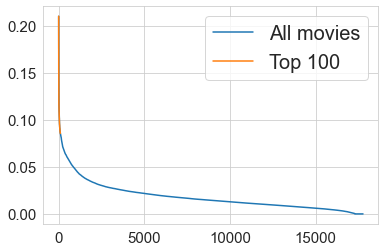

In [99]:
plt.plot(similarities[sim_indices],label = 'All movies')
plt.plot(similarities[sim_indices[:100]],label = 'Top 100')
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 20)
plt.show()

In [100]:
mov_title.loc[sim_indices[:10]]

,year_of_release,title
mov_id,,
323,1999.0,Modern Vampires
4044,1998.0,Subspecies 4: Bloodstorm
1688,1993.0,To Sleep With a Vampire
13962,2001.0,Dracula: The Dark Prince
12053,1993.0,Dracula Rising
16279,2002.0,Vampires: Los Muertos
4667,1996.0,Vampirella
1900,1997.0,Club Vampire
13873,2001.0,The Breed


## Upto this point it was made earlier
## Below this is the new addition to the project which was made today
## But due to igh computational requirement this is being abonded at a certain point

In [9]:
## time for data featuring and put this as a regression problem
## we will do it for 500 users and 50 movies for training
## and 250 users and 25 movies for testing

In [23]:
if not os.path.isfile('train_sample_sparse.npz'):
    start = datetime.now()
    user,mvs,rate = sparse.find(train_sparse_matrix)

    uniq_users = np.unique(user)
    uniq_mvs = np.unique(mvs)

    user_rand = np.random.choice(uniq_users,500,replace=False)
    mvs_rand = np.random.choice(uniq_mvs,50,replace=False)

    chk = np.logical_and(np.isin(user,uniq_users),np.isin(mvs,uniq_mvs))

    train_sample_sparse = sparse.csr_matrix((rate[chk],(user[chk], mvs[chk])),shape=(max(uniq_users)+1,max(uniq_mvs)+1))

    sparse.save_npz('train_sample_sparse.npz',train_sample_sparse)
    print(datetime.now()-start)

else:
     train_sample_sparse = sparse.load_npz('train_sample_sparse.npz')

0:02:34.601720


In [17]:
if not os.path.isfile('test_sample_sparse.npz'):
    start = datetime.now()
    user,mvs,rate = sparse.find(test_sparse_matrix)

    uniq_users = np.unique(user)
    uniq_mvs = np.unique(mvs)

    user_rand = np.random.choice(uniq_users,250,replace=False)
    mvs_rand = np.random.choice(uniq_mvs,25,replace=False)

    chk = np.logical_and(np.isin(user,uniq_users),np.isin(mvs,uniq_mvs))

    test_sample_sparse = sparse.csr_matrix((rate[chk],(user[chk], mvs[chk])),shape=(max(uniq_users)+1,max(uniq_mvs)+1))

    sparse.save_npz('test_sample_sparse.npz',test_sample_sparse)
    print(datetime.now()-start)

else:
     test_sample_sparse = sparse.load_npz('test_sample_sparse.npz')

0:00:37.110682


In [18]:
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(train_sample_sparse)

In [21]:
global_avg_rate_mov = get_avg_rating(train_sample_sparse,False)
global_avg_rate_user = get_avg_rating(train_sample_sparse,True)

In [24]:
if not os.path.isfile('train-model.csv'):
    start = datetime.now()
    print('total number of rows = ',len(sample_train_ratings))
    
    with open('train_model.csv',mode='w') as file:
        cnt=0
        
        for user,movie,rate in zip(sample_train_users,sample_train_movies,sample_train_ratings):
            row = []
            row.append(user)
            row.append(movie)
            row.append(train_sample_sparse.sum()/train_sample_sparse.count_nonzero())
            
            sim_user = cosine_similarity(train_sample_sparse[user],train_sample_sparse).ravel()
            
            sim_user_idx = np.argsort(sim_user)[1:]
            sim_user_rate = train_sample_sparse[sim_user_idx, movie].toarray().ravel()
            top_sim_user_rate = list(sim_user_rate[sim_user_rate != 0][:5])
            top_sim_user_rate.extend([global_avg_rate_mov[movie]]*(5-len(top_sim_user_rate)))
            
            row.extend(top_sim_user_rate)
            
            row.append(global_avg_rate_user[user])
            row.append(global_avg_rate_mov[movie])
            row.append(rate)
            
            file.write(",".join(map(str, row)))
            file.write("\n")
            
            cnt +=1
            
            if cnt%2000==0:
                print('Time for {} rows: {}'.print(cnt,(datetime.now()-start)))
                
    print('total time = {}'.format(datetime.now()-start))

total number of rows =  80384405


KeyboardInterrupt: 

## the above step took more than an hour to process and at this rate it would take nearly 4 months to compute with this specifications, so had to drop here

reimplementing this project again took straight 11 hours. I hope my work pleases you.